In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import TimeDistributed,RepeatVector
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error as mape

In [2]:
df = pd.read_csv('dasatest_N0.csv')
print(df.head()) #7 columns, including the Date. 

      Month  Region 1  Region 2  Region 3  Region 4  Region 5  Region 6  \
0  1/1/2013  0.154325  0.119708  0.178236  0.225016  0.318976  0.049922   
1  1/2/2013  0.122901  0.119831  0.165497  0.220602  0.316835  0.082337   
2  1/3/2013  0.127583  0.112970  0.190754  0.224240  0.328486  0.083182   
3  1/4/2013  0.501557  0.326049  0.321733  0.330916  0.483001  0.156701   
4  1/5/2013  0.103551  0.098852  0.203126  0.268934  0.380898  0.013289   

   Region 7  Region 8  Region 9  ...  Region 3906  Region 3907  Region 3908  \
0  0.219802  0.069055  0.186616  ...     0.154372     0.338739     0.253205   
1  0.175329  0.059602  0.185539  ...     0.180818     0.424401     0.336452   
2  0.178562  0.071814  0.207523  ...     0.407456     0.485308     0.369691   
3  0.245769  0.123014  0.364449  ...     0.403261     0.473134     0.376600   
4  0.139204  0.078820  0.165327  ...     0.334762     0.357057     0.402745   

   Region 3909  Region 3910  Region 3911  Region 3912  Region 3913  \
0   

In [19]:
df['Month'] = pd.to_datetime(df.Month , format = '%d/%m/%Y')
data = df.drop(['Month'], axis=1)
data.index = df.Month
print(df.head())

       Month  Region 1  Region 2  Region 3  Region 4  Region 5  Region 6  \
0 2013-01-01  0.154325  0.119708  0.178236  0.225016  0.318976  0.049922   
1 2013-02-01  0.122901  0.119831  0.165497  0.220602  0.316835  0.082337   
2 2013-03-01  0.127583  0.112970  0.190754  0.224240  0.328486  0.083182   
3 2013-04-01  0.501557  0.326049  0.321733  0.330916  0.483001  0.156701   
4 2013-05-01  0.103551  0.098852  0.203126  0.268934  0.380898  0.013289   

   Region 7  Region 8  Region 9  ...  Region 3906  Region 3907  Region 3908  \
0  0.219802  0.069055  0.186616  ...     0.154372     0.338739     0.253205   
1  0.175329  0.059602  0.185539  ...     0.180818     0.424401     0.336452   
2  0.178562  0.071814  0.207523  ...     0.407456     0.485308     0.369691   
3  0.245769  0.123014  0.364449  ...     0.403261     0.473134     0.376600   
4  0.139204  0.078820  0.165327  ...     0.334762     0.357057     0.402745   

   Region 3909  Region 3910  Region 3911  Region 3912  Region 3913  

In [20]:
cols = data.columns

In [21]:
df_for_training = data[cols].astype(float)

In [22]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [23]:
trainX = []
trainY = []

In [24]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 24 # Number of past days we want to use to predict the future.

In [25]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0:df_for_training.shape[1]])

In [26]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (48, 24, 3915).
trainY shape == (48, 1, 3915).


In [27]:
model = Sequential()
model.add(LSTM(20, activation='softmax', input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(RepeatVector(1))
model.add(LSTM(8, activation='softmax', return_sequences=True))
model.add((TimeDistributed(Dense(trainY.shape[2]))))
model.compile(optimizer='SGD', loss='mape')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 20)                314880    
                                                                 
 repeat_vector_1 (RepeatVect  (None, 1, 20)            0         
 or)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 1, 8)              928       
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 3915)          35235     
 tributed)                                                       
                                                                 
Total params: 351,043
Trainable params: 351,043
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(trainX, trainY, epochs=2000, verbose=1)

Epoch 1/2000
2/2 [==============================] - 1s 29ms/step - loss: 101.0569
Epoch 2/2000
2/2 [==============================] - 0s 29ms/step - loss: 503.9694
Epoch 3/2000
2/2 [==============================] - 0s 28ms/step - loss: 108.8834
Epoch 4/2000
2/2 [==============================] - 0s 26ms/step - loss: 303.2848
Epoch 5/2000
2/2 [==============================] - 0s 30ms/step - loss: 111.8138
Epoch 6/2000
2/2 [==============================] - 0s 28ms/step - loss: 297.0907
Epoch 7/2000
2/2 [==============================] - 0s 30ms/step - loss: 110.8727
Epoch 8/2000
2/2 [==============================] - 0s 29ms/step - loss: 492.5103
Epoch 9/2000
2/2 [==============================] - 0s 30ms/step - loss: 111.0546
Epoch 10/2000
2/2 [==============================] - 0s 28ms/step - loss: 493.6119
Epoch 11/2000
2/2 [==============================] - 0s 28ms/step - loss: 109.3425
Epoch 12/2000
2/2 [==============================] - 0s 28ms/step - loss: 494.7110
Epoch 13/2000

2/2 [==============================] - 0s 30ms/step - loss: 301.3557
Epoch 100/2000
2/2 [==============================] - 0s 31ms/step - loss: 294.7224
Epoch 101/2000
2/2 [==============================] - 0s 31ms/step - loss: 109.2609
Epoch 102/2000
2/2 [==============================] - 0s 32ms/step - loss: 294.5971
Epoch 103/2000
2/2 [==============================] - 0s 33ms/step - loss: 108.6583
Epoch 104/2000
2/2 [==============================] - 0s 31ms/step - loss: 295.9671
Epoch 105/2000
2/2 [==============================] - 0s 31ms/step - loss: 298.2981
Epoch 106/2000
2/2 [==============================] - 0s 34ms/step - loss: 297.1667
Epoch 107/2000
2/2 [==============================] - 0s 31ms/step - loss: 298.6365
Epoch 108/2000
2/2 [==============================] - 0s 29ms/step - loss: 296.3302
Epoch 109/2000
2/2 [==============================] - 0s 32ms/step - loss: 109.4116
Epoch 110/2000
2/2 [==============================] - 0s 31ms/step - loss: 485.8901
Epoch 1

2/2 [==============================] - 0s 26ms/step - loss: 112.4878
Epoch 197/2000
2/2 [==============================] - 0s 24ms/step - loss: 292.0967
Epoch 198/2000
2/2 [==============================] - 0s 26ms/step - loss: 110.7234
Epoch 199/2000
2/2 [==============================] - 0s 26ms/step - loss: 294.3868
Epoch 200/2000
2/2 [==============================] - 0s 25ms/step - loss: 109.0023
Epoch 201/2000
2/2 [==============================] - 0s 26ms/step - loss: 295.0996
Epoch 202/2000
2/2 [==============================] - 0s 27ms/step - loss: 111.3970
Epoch 203/2000
2/2 [==============================] - 0s 26ms/step - loss: 481.4561
Epoch 204/2000
2/2 [==============================] - 0s 26ms/step - loss: 292.3078
Epoch 205/2000
2/2 [==============================] - 0s 28ms/step - loss: 110.0620
Epoch 206/2000
2/2 [==============================] - 0s 30ms/step - loss: 294.0316
Epoch 207/2000
2/2 [==============================] - 0s 29ms/step - loss: 112.2671
Epoch 2

2/2 [==============================] - 0s 26ms/step - loss: 109.8483
Epoch 294/2000
2/2 [==============================] - 0s 27ms/step - loss: 481.6250
Epoch 295/2000
2/2 [==============================] - 0s 26ms/step - loss: 290.9067
Epoch 296/2000
2/2 [==============================] - 0s 28ms/step - loss: 301.4873
Epoch 297/2000
2/2 [==============================] - 0s 29ms/step - loss: 111.0351
Epoch 298/2000
2/2 [==============================] - 0s 27ms/step - loss: 291.3875
Epoch 299/2000
2/2 [==============================] - 0s 25ms/step - loss: 112.9198
Epoch 300/2000
2/2 [==============================] - 0s 24ms/step - loss: 479.6794
Epoch 301/2000
2/2 [==============================] - 0s 28ms/step - loss: 291.5643
Epoch 302/2000
2/2 [==============================] - 0s 26ms/step - loss: 303.3496
Epoch 303/2000
2/2 [==============================] - 0s 26ms/step - loss: 289.7854
Epoch 304/2000
2/2 [==============================] - 0s 26ms/step - loss: 113.4027
Epoch 3

2/2 [==============================] - 0s 26ms/step - loss: 289.0005
Epoch 391/2000
2/2 [==============================] - 0s 26ms/step - loss: 302.4659
Epoch 392/2000
2/2 [==============================] - 0s 26ms/step - loss: 289.5783
Epoch 393/2000
2/2 [==============================] - 0s 29ms/step - loss: 113.4942
Epoch 394/2000
2/2 [==============================] - 0s 26ms/step - loss: 287.7881
Epoch 395/2000
2/2 [==============================] - 0s 25ms/step - loss: 115.3269
Epoch 396/2000
2/2 [==============================] - 0s 25ms/step - loss: 286.0298
Epoch 397/2000
2/2 [==============================] - 0s 28ms/step - loss: 115.7804
Epoch 398/2000
2/2 [==============================] - 0s 26ms/step - loss: 284.9505
Epoch 399/2000
2/2 [==============================] - 0s 28ms/step - loss: 306.4020
Epoch 400/2000
2/2 [==============================] - 0s 26ms/step - loss: 285.1791
Epoch 401/2000
2/2 [==============================] - 0s 27ms/step - loss: 114.4849
Epoch 4

2/2 [==============================] - 0s 28ms/step - loss: 114.2317
Epoch 488/2000
2/2 [==============================] - 0s 25ms/step - loss: 474.6414
Epoch 489/2000
2/2 [==============================] - 0s 28ms/step - loss: 118.6080
Epoch 490/2000
2/2 [==============================] - 0s 27ms/step - loss: 284.6476
Epoch 491/2000
2/2 [==============================] - 0s 25ms/step - loss: 115.0706
Epoch 492/2000
2/2 [==============================] - 0s 25ms/step - loss: 286.6200
Epoch 493/2000
2/2 [==============================] - 0s 29ms/step - loss: 116.5616
Epoch 494/2000
2/2 [==============================] - 0s 32ms/step - loss: 284.2223
Epoch 495/2000
2/2 [==============================] - 0s 32ms/step - loss: 306.4332
Epoch 496/2000
2/2 [==============================] - 0s 30ms/step - loss: 285.4566
Epoch 497/2000
2/2 [==============================] - 0s 34ms/step - loss: 116.9726
Epoch 498/2000
2/2 [==============================] - 0s 34ms/step - loss: 283.3061
Epoch 4

2/2 [==============================] - 0s 30ms/step - loss: 467.8196
Epoch 585/2000
2/2 [==============================] - 0s 34ms/step - loss: 280.9243
Epoch 586/2000
2/2 [==============================] - 0s 29ms/step - loss: 307.8015
Epoch 587/2000
2/2 [==============================] - 0s 33ms/step - loss: 124.4524
Epoch 588/2000
2/2 [==============================] - 0s 32ms/step - loss: 279.1777
Epoch 589/2000
2/2 [==============================] - 0s 34ms/step - loss: 122.5784
Epoch 590/2000
2/2 [==============================] - 0s 29ms/step - loss: 280.1430
Epoch 591/2000
2/2 [==============================] - 0s 29ms/step - loss: 311.3234
Epoch 592/2000
2/2 [==============================] - 0s 29ms/step - loss: 120.5467
Epoch 593/2000
2/2 [==============================] - 0s 28ms/step - loss: 472.9945
Epoch 594/2000
2/2 [==============================] - 0s 30ms/step - loss: 120.9901
Epoch 595/2000
2/2 [==============================] - 0s 31ms/step - loss: 468.6008
Epoch 5

2/2 [==============================] - 0s 27ms/step - loss: 470.7133
Epoch 682/2000
2/2 [==============================] - 0s 25ms/step - loss: 278.6607
Epoch 683/2000
2/2 [==============================] - 0s 25ms/step - loss: 123.4374
Epoch 684/2000
2/2 [==============================] - 0s 24ms/step - loss: 466.2994
Epoch 685/2000
2/2 [==============================] - 0s 23ms/step - loss: 282.1562
Epoch 686/2000
2/2 [==============================] - 0s 22ms/step - loss: 121.2885
Epoch 687/2000
2/2 [==============================] - 0s 26ms/step - loss: 468.5551
Epoch 688/2000
2/2 [==============================] - 0s 25ms/step - loss: 120.8779
Epoch 689/2000
2/2 [==============================] - 0s 24ms/step - loss: 471.4005
Epoch 690/2000
2/2 [==============================] - 0s 26ms/step - loss: 281.0056
Epoch 691/2000
2/2 [==============================] - 0s 24ms/step - loss: 120.1388
Epoch 692/2000
2/2 [==============================] - 0s 27ms/step - loss: 280.5271
Epoch 6

2/2 [==============================] - 0s 24ms/step - loss: 280.0709
Epoch 779/2000
2/2 [==============================] - 0s 24ms/step - loss: 121.8221
Epoch 780/2000
2/2 [==============================] - 0s 26ms/step - loss: 467.2182
Epoch 781/2000
2/2 [==============================] - 0s 24ms/step - loss: 277.7936
Epoch 782/2000
2/2 [==============================] - 0s 27ms/step - loss: 125.4542
Epoch 783/2000
2/2 [==============================] - 0s 24ms/step - loss: 466.3973
Epoch 784/2000
2/2 [==============================] - 0s 26ms/step - loss: 279.0485
Epoch 785/2000
2/2 [==============================] - 0s 25ms/step - loss: 123.5432
Epoch 786/2000
2/2 [==============================] - 0s 25ms/step - loss: 277.4513
Epoch 787/2000
2/2 [==============================] - 0s 27ms/step - loss: 121.9532
Epoch 788/2000
2/2 [==============================] - 0s 27ms/step - loss: 279.1240
Epoch 789/2000
2/2 [==============================] - 0s 25ms/step - loss: 123.3087
Epoch 7

2/2 [==============================] - 0s 23ms/step - loss: 281.9319
Epoch 876/2000
2/2 [==============================] - 0s 23ms/step - loss: 121.7408
Epoch 877/2000
2/2 [==============================] - 0s 24ms/step - loss: 468.5135
Epoch 878/2000
2/2 [==============================] - 0s 24ms/step - loss: 280.0016
Epoch 879/2000
2/2 [==============================] - 0s 27ms/step - loss: 308.1499
Epoch 880/2000
2/2 [==============================] - 0s 24ms/step - loss: 279.8649
Epoch 881/2000
2/2 [==============================] - 0s 25ms/step - loss: 120.0426
Epoch 882/2000
2/2 [==============================] - 0s 25ms/step - loss: 470.7236
Epoch 883/2000
2/2 [==============================] - 0s 24ms/step - loss: 278.6327
Epoch 884/2000
2/2 [==============================] - 0s 24ms/step - loss: 313.0061
Epoch 885/2000
2/2 [==============================] - 0s 25ms/step - loss: 122.6082
Epoch 886/2000
2/2 [==============================] - 0s 25ms/step - loss: 276.3952
Epoch 8

2/2 [==============================] - 0s 35ms/step - loss: 310.1861
Epoch 973/2000
2/2 [==============================] - 0s 26ms/step - loss: 120.8045
Epoch 974/2000
2/2 [==============================] - 0s 31ms/step - loss: 470.8419
Epoch 975/2000
2/2 [==============================] - 0s 32ms/step - loss: 120.8744
Epoch 976/2000
2/2 [==============================] - 0s 35ms/step - loss: 282.3238
Epoch 977/2000
2/2 [==============================] - 0s 25ms/step - loss: 118.4712
Epoch 978/2000
2/2 [==============================] - 0s 25ms/step - loss: 471.0954
Epoch 979/2000
2/2 [==============================] - 0s 27ms/step - loss: 280.7246
Epoch 980/2000
2/2 [==============================] - 0s 28ms/step - loss: 306.4923
Epoch 981/2000
2/2 [==============================] - 0s 25ms/step - loss: 282.2349
Epoch 982/2000
2/2 [==============================] - 0s 26ms/step - loss: 120.6768
Epoch 983/2000
2/2 [==============================] - 0s 24ms/step - loss: 467.9804
Epoch 9

2/2 [==============================] - 0s 26ms/step - loss: 307.6228
Epoch 1069/2000
2/2 [==============================] - 0s 27ms/step - loss: 120.7630
Epoch 1070/2000
2/2 [==============================] - 0s 23ms/step - loss: 281.3938
Epoch 1071/2000
2/2 [==============================] - 0s 27ms/step - loss: 308.0891
Epoch 1072/2000
2/2 [==============================] - 0s 25ms/step - loss: 124.5851
Epoch 1073/2000
2/2 [==============================] - 0s 25ms/step - loss: 278.6649
Epoch 1074/2000
2/2 [==============================] - 0s 25ms/step - loss: 121.4166
Epoch 1075/2000
2/2 [==============================] - 0s 27ms/step - loss: 280.9031
Epoch 1076/2000
2/2 [==============================] - 0s 25ms/step - loss: 309.5541
Epoch 1077/2000
2/2 [==============================] - 0s 25ms/step - loss: 118.5960
Epoch 1078/2000
2/2 [==============================] - 0s 28ms/step - loss: 283.3047
Epoch 1079/2000
2/2 [==============================] - 0s 25ms/step - loss: 307.0

2/2 [==============================] - 0s 26ms/step - loss: 114.8558
Epoch 1165/2000
2/2 [==============================] - 0s 26ms/step - loss: 283.5328
Epoch 1166/2000
2/2 [==============================] - 0s 25ms/step - loss: 116.7883
Epoch 1167/2000
2/2 [==============================] - 0s 27ms/step - loss: 473.1108
Epoch 1168/2000
2/2 [==============================] - 0s 26ms/step - loss: 283.2565
Epoch 1169/2000
2/2 [==============================] - 0s 23ms/step - loss: 306.1826
Epoch 1170/2000
2/2 [==============================] - 0s 26ms/step - loss: 114.9107
Epoch 1171/2000
2/2 [==============================] - 0s 24ms/step - loss: 476.4452
Epoch 1172/2000
2/2 [==============================] - 0s 25ms/step - loss: 283.2638
Epoch 1173/2000
2/2 [==============================] - 0s 24ms/step - loss: 303.4817
Epoch 1174/2000
2/2 [==============================] - 0s 24ms/step - loss: 287.3648
Epoch 1175/2000
2/2 [==============================] - 0s 24ms/step - loss: 302.7

2/2 [==============================] - 0s 26ms/step - loss: 113.1751
Epoch 1261/2000
2/2 [==============================] - 0s 25ms/step - loss: 478.9884
Epoch 1262/2000
2/2 [==============================] - 0s 28ms/step - loss: 290.3830
Epoch 1263/2000
2/2 [==============================] - 0s 25ms/step - loss: 112.2730
Epoch 1264/2000
2/2 [==============================] - 0s 24ms/step - loss: 286.8583
Epoch 1265/2000
2/2 [==============================] - 0s 26ms/step - loss: 113.6903
Epoch 1266/2000
2/2 [==============================] - 0s 26ms/step - loss: 289.8275
Epoch 1267/2000
2/2 [==============================] - 0s 24ms/step - loss: 109.3187
Epoch 1268/2000
2/2 [==============================] - 0s 26ms/step - loss: 289.3143
Epoch 1269/2000
2/2 [==============================] - 0s 25ms/step - loss: 109.3516
Epoch 1270/2000
2/2 [==============================] - 0s 24ms/step - loss: 291.0439
Epoch 1271/2000
2/2 [==============================] - 0s 27ms/step - loss: 110.4

2/2 [==============================] - 0s 24ms/step - loss: 286.5045
Epoch 1357/2000
2/2 [==============================] - 0s 24ms/step - loss: 299.9679
Epoch 1358/2000
2/2 [==============================] - 0s 24ms/step - loss: 288.0689
Epoch 1359/2000
2/2 [==============================] - 0s 24ms/step - loss: 302.4434
Epoch 1360/2000
2/2 [==============================] - 0s 24ms/step - loss: 289.0323
Epoch 1361/2000
2/2 [==============================] - 0s 24ms/step - loss: 303.9645
Epoch 1362/2000
2/2 [==============================] - 0s 25ms/step - loss: 287.3197
Epoch 1363/2000
2/2 [==============================] - 0s 25ms/step - loss: 302.1474
Epoch 1364/2000
2/2 [==============================] - 0s 25ms/step - loss: 115.8518
Epoch 1365/2000
2/2 [==============================] - 0s 24ms/step - loss: 285.9573
Epoch 1366/2000
2/2 [==============================] - 0s 25ms/step - loss: 302.9482
Epoch 1367/2000
2/2 [==============================] - 0s 25ms/step - loss: 286.1

2/2 [==============================] - 0s 28ms/step - loss: 285.8007
Epoch 1453/2000
2/2 [==============================] - 0s 25ms/step - loss: 116.4019
Epoch 1454/2000
2/2 [==============================] - 0s 26ms/step - loss: 283.1742
Epoch 1455/2000
2/2 [==============================] - 0s 25ms/step - loss: 117.3216
Epoch 1456/2000
2/2 [==============================] - 0s 27ms/step - loss: 284.2169
Epoch 1457/2000
2/2 [==============================] - 0s 24ms/step - loss: 116.8336
Epoch 1458/2000
2/2 [==============================] - 0s 22ms/step - loss: 281.7550
Epoch 1459/2000
2/2 [==============================] - 0s 27ms/step - loss: 117.8971
Epoch 1460/2000
2/2 [==============================] - 0s 25ms/step - loss: 472.1292
Epoch 1461/2000
2/2 [==============================] - 0s 25ms/step - loss: 288.2811
Epoch 1462/2000
2/2 [==============================] - 0s 26ms/step - loss: 115.0963
Epoch 1463/2000
2/2 [==============================] - 0s 27ms/step - loss: 283.5

2/2 [==============================] - 0s 26ms/step - loss: 280.0266
Epoch 1549/2000
2/2 [==============================] - 0s 25ms/step - loss: 119.9939
Epoch 1550/2000
2/2 [==============================] - 0s 25ms/step - loss: 278.6666
Epoch 1551/2000
2/2 [==============================] - 0s 26ms/step - loss: 308.7027
Epoch 1552/2000
2/2 [==============================] - 0s 25ms/step - loss: 283.8275
Epoch 1553/2000
2/2 [==============================] - 0s 26ms/step - loss: 117.1837
Epoch 1554/2000
2/2 [==============================] - 0s 24ms/step - loss: 471.1324
Epoch 1555/2000
2/2 [==============================] - 0s 25ms/step - loss: 119.4826
Epoch 1556/2000
2/2 [==============================] - 0s 26ms/step - loss: 281.7590
Epoch 1557/2000
2/2 [==============================] - 0s 23ms/step - loss: 121.4969
Epoch 1558/2000
2/2 [==============================] - 0s 27ms/step - loss: 280.1264
Epoch 1559/2000
2/2 [==============================] - 0s 25ms/step - loss: 310.1

2/2 [==============================] - 0s 25ms/step - loss: 310.2636
Epoch 1645/2000
2/2 [==============================] - 0s 29ms/step - loss: 278.4604
Epoch 1646/2000
2/2 [==============================] - 0s 25ms/step - loss: 309.5585
Epoch 1647/2000
2/2 [==============================] - 0s 21ms/step - loss: 279.1503
Epoch 1648/2000
2/2 [==============================] - 0s 24ms/step - loss: 309.7012
Epoch 1649/2000
2/2 [==============================] - 0s 25ms/step - loss: 278.6635
Epoch 1650/2000
2/2 [==============================] - 0s 24ms/step - loss: 124.1617
Epoch 1651/2000
2/2 [==============================] - 0s 23ms/step - loss: 278.3814
Epoch 1652/2000
2/2 [==============================] - 0s 27ms/step - loss: 120.9155
Epoch 1653/2000
2/2 [==============================] - 0s 26ms/step - loss: 279.7089
Epoch 1654/2000
2/2 [==============================] - 0s 25ms/step - loss: 309.7133
Epoch 1655/2000
2/2 [==============================] - 0s 26ms/step - loss: 120.1

2/2 [==============================] - 0s 27ms/step - loss: 280.1240
Epoch 1741/2000
2/2 [==============================] - 0s 26ms/step - loss: 121.9091
Epoch 1742/2000
2/2 [==============================] - 0s 25ms/step - loss: 280.2366
Epoch 1743/2000
2/2 [==============================] - 0s 24ms/step - loss: 309.3571
Epoch 1744/2000
2/2 [==============================] - 0s 25ms/step - loss: 120.7954
Epoch 1745/2000
2/2 [==============================] - 0s 26ms/step - loss: 470.1552
Epoch 1746/2000
2/2 [==============================] - 0s 25ms/step - loss: 278.6709
Epoch 1747/2000
2/2 [==============================] - 0s 24ms/step - loss: 310.1544
Epoch 1748/2000
2/2 [==============================] - 0s 26ms/step - loss: 280.0687
Epoch 1749/2000
2/2 [==============================] - 0s 25ms/step - loss: 120.3184
Epoch 1750/2000
2/2 [==============================] - 0s 25ms/step - loss: 279.7002
Epoch 1751/2000
2/2 [==============================] - 0s 23ms/step - loss: 121.0

2/2 [==============================] - 0s 24ms/step - loss: 316.2538
Epoch 1837/2000
2/2 [==============================] - 0s 24ms/step - loss: 125.6372
Epoch 1838/2000
2/2 [==============================] - 0s 28ms/step - loss: 273.8982
Epoch 1839/2000
2/2 [==============================] - 0s 25ms/step - loss: 316.8937
Epoch 1840/2000
2/2 [==============================] - 0s 26ms/step - loss: 128.5108
Epoch 1841/2000
2/2 [==============================] - 0s 26ms/step - loss: 461.1577
Epoch 1842/2000
2/2 [==============================] - 0s 25ms/step - loss: 127.6964
Epoch 1843/2000
2/2 [==============================] - 0s 25ms/step - loss: 272.9557
Epoch 1844/2000
2/2 [==============================] - 0s 27ms/step - loss: 126.5600
Epoch 1845/2000
2/2 [==============================] - 0s 25ms/step - loss: 272.8555
Epoch 1846/2000
2/2 [==============================] - 0s 25ms/step - loss: 318.2678
Epoch 1847/2000
2/2 [==============================] - 0s 26ms/step - loss: 127.9

2/2 [==============================] - 0s 25ms/step - loss: 132.2992
Epoch 1933/2000
2/2 [==============================] - 0s 24ms/step - loss: 271.1033
Epoch 1934/2000
2/2 [==============================] - 0s 27ms/step - loss: 318.9503
Epoch 1935/2000
2/2 [==============================] - 0s 28ms/step - loss: 130.3703
Epoch 1936/2000
2/2 [==============================] - 0s 26ms/step - loss: 269.0487
Epoch 1937/2000
2/2 [==============================] - 0s 24ms/step - loss: 132.2090
Epoch 1938/2000
2/2 [==============================] - 0s 26ms/step - loss: 267.8852
Epoch 1939/2000
2/2 [==============================] - 0s 25ms/step - loss: 131.8475
Epoch 1940/2000
2/2 [==============================] - 0s 25ms/step - loss: 458.1892
Epoch 1941/2000
2/2 [==============================] - 0s 28ms/step - loss: 271.7690
Epoch 1942/2000
2/2 [==============================] - 0s 26ms/step - loss: 127.9506
Epoch 1943/2000
2/2 [==============================] - 0s 25ms/step - loss: 462.1

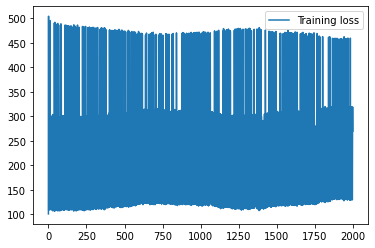

In [29]:
plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

(48, 1, 3915)
0.7774837234369842


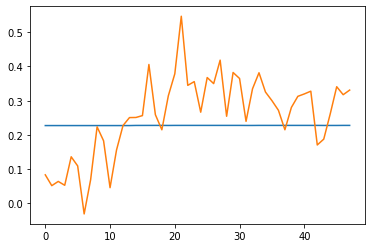

In [30]:
yhat = model.predict(trainX)
print(yhat.shape)
yhat = yhat.reshape(yhat.shape[0],yhat.shape[2])
ypred = scaler.inverse_transform(yhat)
plot1 = plt.plot(ypred[:,10])
data = np.array(data)
plot1 = plt.plot(data[-ypred.shape[0]:,10])
error = mape(data[-ypred.shape[0]:,10],ypred[:,10])
print(error)
plt.show(plot1)

In [31]:
def model_predict(model,X_input,n_steps,n_steps_out):   
    x_input = X_input
    ypred = np.zeros([1,15,3915])
    
    i = 0
    while(i < n_steps_out):
        
        if(x_input.shape[1] > n_steps):
            x_input = x_input[:,1:,:]
            yhat = model.predict(x_input)
            ypred[:,i,:] = yhat
            x_input = np.concatenate((x_input,yhat),axis=1)
            i=i+1
        
        else:
            yhat = model.predict(x_input)
            ypred[:,i,:] = yhat
            x_input = np.concatenate((x_input,yhat),axis=1)
            i=i+1

#     print(ypred)
    return(np.array(ypred))

In [32]:
X_input = df_for_training_scaled[-24:,:]
X_input = X_input.reshape(1,X_input.shape[0],X_input.shape[1])
yhat = model.predict(X_input)
print(yhat.shape)
ypred = model_predict(model,X_input,24,15)
ypred = ypred.reshape(15,3915)
# print(ypred)
yhat = scaler.inverse_transform(ypred)
print(yhat)

(1, 1, 3915)
[[0.24197234 0.22197461 0.29967753 ... 0.74050516 1.62546709 0.52252064]
 [0.2418148  0.22193298 0.29964819 ... 0.74037726 1.62537815 0.52237085]
 [0.24179317 0.22192808 0.29964421 ... 0.74036085 1.62536603 0.5223519 ]
 ...
 [0.24163564 0.221893   0.29961544 ... 0.74024193 1.62527769 0.52221446]
 [0.24163506 0.22189287 0.29961534 ... 0.7402415  1.62527737 0.52221396]
 [0.24163467 0.22189278 0.29961527 ... 0.7402412  1.62527715 0.52221362]]


In [33]:
output = pd.DataFrame(yhat)
output.to_csv('submission_LSTM_20_8_SGD.csv')
print("Your submission was successfully saved!")

Your submission was successfully saved!
